In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
train_csv = pd.read_csv("datasets/train.csv.zip", compression="zip", header=0)

In [106]:
train_count = None
if train_count != None:
    train = train_csv.sample(n=train_count)
else:
    train = train_csv
y = train["label"]
train = train.drop("label", axis="columns", errors="ignore")
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2)
X_train = scale(X_train)
X_test = scale(X_test)


In [101]:
# classifier = RandomForestClassifier()
classifier = SVC(kernel="poly", gamma="scale")
param_grid = {
    "C": [8, 10, 11, 12, 14, 18, 20, 21, 22, 24, 28, 30],
    # "kernel": ["linear", "poly", "rbf", "sigmoid"],
    # "gamma": ["scale", "auto"],
}
# param_grid = {"n_estimators": [400]}
cross_validations = 20
grid = GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    cv=cross_validations,
    scoring="accuracy",
    n_jobs=-1,
)
grid.fit(X_train, y_train)


GridSearchCV(cv=20, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': [8, 10, 11, 12, 14, 18, 20, 21, 22, 24, 28, 30]},
             scoring='accuracy')

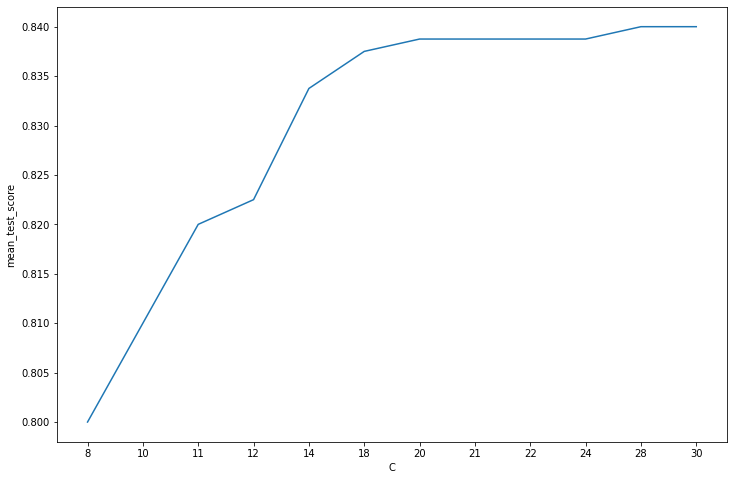

,params,rank_test_score,mean_test_score,std_test_score
C,,,,
8,{'C': 8},12,0.80000,0.061237
10,{'C': 10},11,0.81000,0.057228
11,{'C': 11},10,0.82000,0.049117
12,{'C': 12},9,0.82250,0.045346
14,{'C': 14},8,0.83375,0.041288
18,{'C': 18},7,0.83750,0.040697
20,{'C': 20},3,0.83875,0.038304
21,{'C': 21},3,0.83875,0.038304
22,{'C': 22},3,0.83875,0.038304


In [102]:
results_df = pd.DataFrame(grid.cv_results_)
#parameter_name = "n_estimators"
parameter_name = "C"
# results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis(parameter_name)

plt.figure(figsize=(12,8))
plt.xlabel(parameter_name)
plt.ylabel("mean_test_score")
plt.plot(results_df.index, results_df["mean_test_score"])
plt.show()
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

In [107]:
classifier = SVC(C=20, gamma="scale", kernel="poly")
# classifier = RandomForestClassifier(n_estimators=500, random_state=1234)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred, average=None)
# recall = recall_score(y_test, y_pred, average=None)
num_acc = accuracy_score(y_test, y_pred, normalize=False)

print("accuracy_score : ", acc)
# print("precision_score : ", prec)
# print("recall_score : ", recall)
print("accuracy_count : ", num_acc, " of ", len(y_test))
# take first 10000 samples from train.csv
# train_test_split
# sklearn.preprocess.scale train and test features
# sklearn.svm.SVC
# sklearn.svm.SVC(C=7, gamma=0.009)?
# GridSearch
# RandomForestClassifier


accuracy_score :  0.9739285714285715
accuracy_count :  8181  of  8400


In [108]:
test = pd.read_csv("datasets/test.csv.zip", compression="zip", header=0)
test = scale(test)
predictions = classifier.predict(test)

In [109]:
submission = pd.DataFrame({
    "ImageId": range(1, len(predictions) + 1),
    "Label": predictions
})
submission.to_csv("datasets/submission.csv", index=False)